(40, 431)


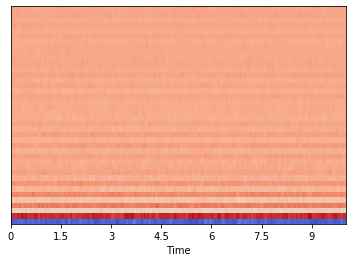

In [1]:
#test of mfcc on sample of data
import librosa 
from scipy.io import wavfile as wav
import numpy as np
import librosa.display
filename = 'DataSet/pump/normal/1.wav'
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')


In [2]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import csv
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

max_pad_len = 432
def mfcc_feature(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = np.abs(max_pad_len - mfccs.shape[1])
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    return mfccs

features_data = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('DataSet/'),str(row["label1"])+
                             '/',str(row["label2"])+'/',str(row["file_name"]))
    class_label1 = row["label1"]
    class_label2 = row["label2"]
    data = mfcc_feature(file_name)
    
    features_data.append([data, class_label1,class_label2])
    value = np.asarray(data, dtype=np.int).reshape(data.shape[0],data.shape[1])
    value = value.flatten()
    #print(value)
    with open("data.csv", 'a') as f:
        writer = csv.writer(f,delimiter=',')
        writer.writerow([value,class_label1,class_label2]) 